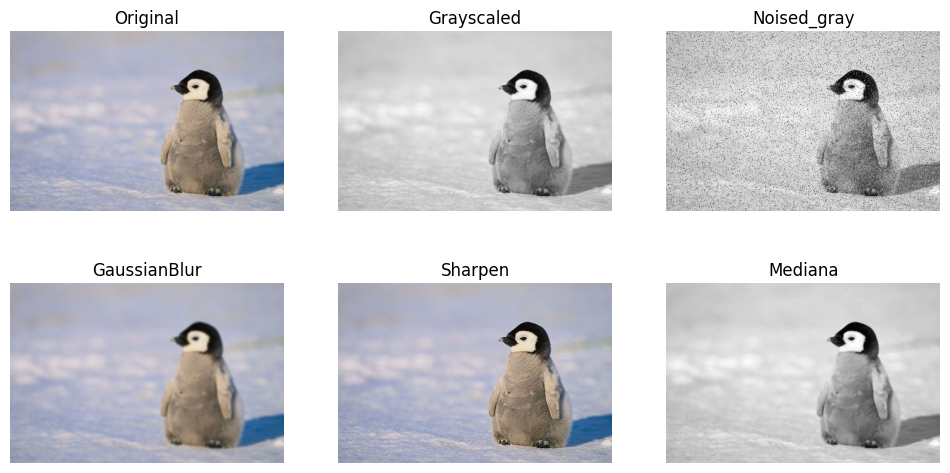

In [13]:
'''
КРБО-01-21
Толчев, Еличев, Кайлачаков
Информационные элементы робототехнических систем
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


# функция выведения отфильтрованных изображений
def viewImages(images, titles):
    num_images = len(images)
    num_rows = 2  # Количество строк
    num_cols = (num_images + 1) // num_rows

    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# оригинал
img = cv2.imread('penquinchiks.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# черно-белое изображение
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# шум соль перец
img_size = img_gray.size
noise_percentage = 0.1  # 10% зашумления
noise_size = int(noise_percentage * img_size)
random_indices = np.random.choice(img_size, noise_size)
img_noised = img_gray.copy()
noise = np.random.choice([img_gray.min(), img_gray.max()], noise_size)
img_noised.flat[random_indices] = noise

#  встроенный блюр
img_blured = cv2.GaussianBlur(img, (11, 11), 0)

# повышение резкости
sharp_filter = 1/10 * np.array([[-1, -2, -1], [-2, 22, -2], [-1, -2, -1]])
sharpen_img = cv2.filter2D(img, ddepth=0, kernel=sharp_filter)

# медиана
def median_filter(image, kernel_size):
    height, width = image.shape
    filtered_image = np.zeros_like(image)

    half_kernel_size = kernel_size // 2

    for i in range(height):
        for j in range(width):
            min_row = max(0, i - half_kernel_size)
            max_row = min(height, i + half_kernel_size + 1)
            min_col = max(0, j - half_kernel_size)
            max_col = min(width, j + half_kernel_size + 1)

            # значения пикселей в окне
            window_values = image[min_row:max_row, min_col:max_col]

            filtered_image[i, j] = np.median(window_values)

    return filtered_image

median_img = median_filter(img_noised, kernel_size=5)


viewImages([img, img_gray, img_noised,img_blured, sharpen_img,median_img], ['Original', 'Grayscaled', 'Noised_gray', 'GaussianBlur', 'Sharpen', 'Mediana'])
